/home/protik/anaconda2/lib/python2.7/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


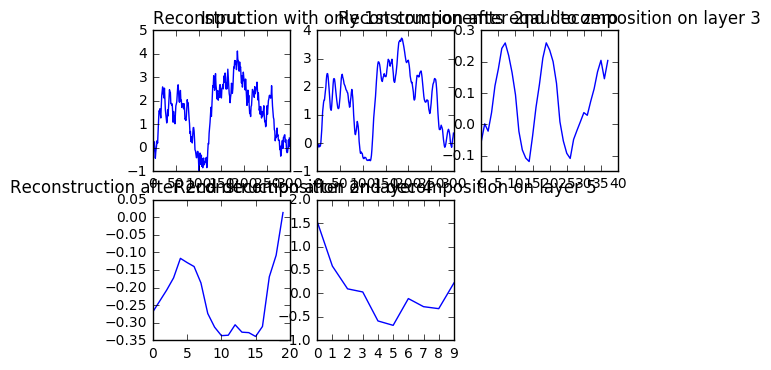

Maximum reconstruction error: 5.09484187747


In [6]:
from matplotlib import pyplot as plt
import numpy as np
import dtcwt
import copy 

# Generate a 300x2 array of a random walk
vecs = np.cumsum(np.random.rand(300,1) - 0.5, 0)
#print vecs
# 1D transform, 5 levels
transform = dtcwt.Transform1d()
vecs_t = transform.forward(vecs, nlevels=6)

# Inverse
vecs_recon = transform.inverse(vecs_t)

# Inverse with first component removed
for jj in range(len(vecs_t.highpasses[0])):
    vecs_t.highpasses[0][jj] = 0     

# Inverse with first and second component removed
for jj in range(len(vecs_t.highpasses[1])):
    vecs_t.highpasses[1][jj] = 0 

vecs_recon2 = transform.inverse(vecs_t)


# do the second layer of decomposition on 3rd, 4th and 5th highpass components

# for 3rd layer into 6 layers with first two layers zero

if len(vecs_t.highpasses[2])%2!=0:
    z=np.zeros((1, 1), vecs_t.highpasses[2].dtype)
    array=np.concatenate((vecs_t.highpasses[2], z),0)
else:
    array=vecs_t.highpasses[2]
    
vecs_t_2nd = transform.forward(array, nlevels=6)

for jj in range(len(vecs_t_2nd.highpasses[0])):
    vecs_t_2nd.highpasses[0][jj] = 0
    
for jj in range(len(vecs_t_2nd.highpasses[1])):
    vecs_t_2nd.highpasses[1][jj] = 0

vecs_recon_2nd_2 = transform.inverse(vecs_t_2nd)

# for 4rd layer into 6 layers with first two layers zero

if len(vecs_t.highpasses[3])%2!=0:
    z=np.zeros((1, 1), vecs_t.highpasses[3].dtype)
    array=np.concatenate((vecs_t.highpasses[3], z),0)
else:
    array=vecs_t.highpasses[3]

vecs_t_2nd = transform.forward(array, nlevels=6)

for jj in range(len(vecs_t_2nd.highpasses[0])):
    vecs_t_2nd.highpasses[0][jj] = 0
    
for jj in range(len(vecs_t_2nd.highpasses[1])):
    vecs_t_2nd.highpasses[1][jj] = 0

vecs_recon_2nd_3 = transform.inverse(vecs_t_2nd)

# for 5th layer into 6 layers with one layer zero

if len(vecs_t.highpasses[4])%2!=0:
    z=np.zeros((1, 1), vecs_t.highpasses[4].dtype)
    array=np.concatenate((vecs_t.highpasses[4], z),0)
else:
    array=vecs_t.highpasses[4]

vecs_t_2nd = transform.forward(array, nlevels=6)

for jj in range(len(vecs_t_2nd.highpasses[0])):
    vecs_t_2nd.highpasses[0][jj] = 0

vecs_recon_2nd_4 = transform.inverse(vecs_t_2nd)
    
# plotting the reconstruction

plt.subplot(2, 3, 1)
plt.title('Input')
plt.plot(vecs)

plt.subplot(2, 3, 2)
plt.title('Reconstruction with only 1st componemts eqaul to zero')
plt.plot(vecs_recon2)

plt.subplot(2, 3, 3)
plt.title('Reconstruction after 2nd decomposition on layer 3')
plt.plot(vecs_recon_2nd_2)

plt.subplot(2, 3, 4)
plt.title('Reconstruction after 2nd decomposition on layer 4')
plt.plot(vecs_recon_2nd_3)

plt.subplot(2, 3, 5)
plt.title('Reconstruction after 2nd decomposition on layer 5')
plt.plot(vecs_recon_2nd_4)


plt.show()

print('Maximum reconstruction error: {0}'.format(np.max(np.abs(vecs - vecs_recon))))
